In [470]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn. ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score

import itertools    


from sklearn.svm import SVC
import sys
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [471]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')
print(wine_data.quality.value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [472]:
print(wine_data.shape)
wine_data.head()



(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [473]:

wine_data.quality.unique()


array([5, 6, 7, 4, 8, 3])

In [474]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [475]:
bins = (2, 6.5, 8)
labels = ("bad", "good")
binned_wine = pd.cut(wine_data.quality, bins, labels=labels)

In [476]:
binned_wine.head(10)

0     bad
1     bad
2     bad
3     bad
4     bad
5     bad
6     bad
7    good
8    good
9     bad
Name: quality, dtype: category
Categories (2, object): [bad < good]

In [477]:
label_quality = LabelEncoder()

In [478]:
encoded_wine = label_quality.fit_transform(binned_wine)

In [479]:
np.unique(encoded_wine)

array([0, 1])

In [480]:
wine_data.quality = encoded_wine

In [481]:
wine_data.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [482]:
wine_data.quality.value_counts()

0    1382
1     217
Name: quality, dtype: int64

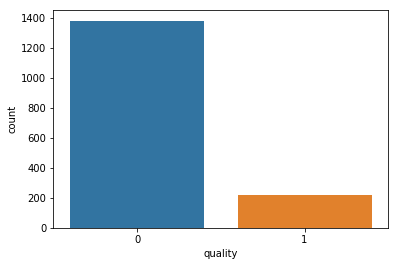

In [483]:
sns.countplot(wine_data.quality)

In [484]:
X = wine_data.drop('quality', axis=1) #axis=1 means drop 'quality' in each row

In [485]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [486]:
y = wine_data.quality

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [488]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [633]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm,title, classes = ['Bad Wine','Good Wine'], 
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    
    """
  
  

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Random Forest Classifier

In [635]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.75      0.51      0.61        47

   micro avg       0.90      0.90      0.90       320
   macro avg       0.84      0.74      0.78       320
weighted avg       0.90      0.90      0.90       320



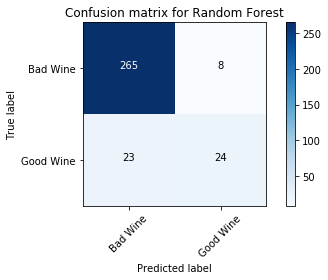

In [637]:
# Print the classification report
print(classification_report(y_test, predict_rfc))

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predict_rfc),
                      title='Confusion matrix for Random Forest')

# SVM Classifier

In [581]:
clf = svm.SVC()
clf.fit(X_train, y_train)
predict_svc = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



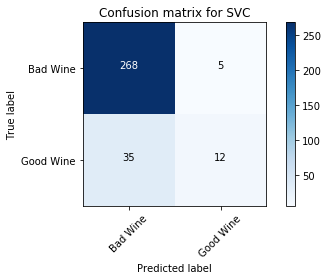

In [582]:
# Model evaluation
print(classification_report(y_test, predict_svc))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict_svc)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix for SVC')


# Neural Network

In [583]:
mlp = MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)
mlp.fit(X_train, y_train)
predict_mlp = mlp.predict(X_test)

/home/spring/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       273
           1       0.64      0.62      0.63        47

   micro avg       0.89      0.89      0.89       320
   macro avg       0.79      0.78      0.78       320
weighted avg       0.89      0.89      0.89       320



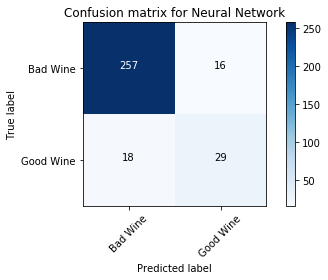

In [584]:
# Model evaluation
print(classification_report(y_test, predict_mlp))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict_mlp)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix for Neural Network')

# K-Nearest Neighbour

In [585]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       273
           1       0.59      0.43      0.49        47

   micro avg       0.87      0.87      0.87       320
   macro avg       0.75      0.69      0.71       320
weighted avg       0.86      0.87      0.86       320

Accuracy score: 0.871875


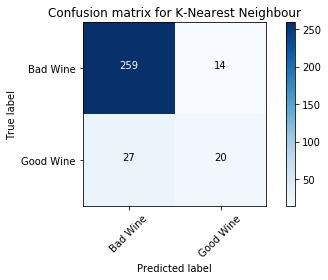

In [586]:
# Model evaluation
print(classification_report(y_test, predict_knn))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict_knn)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      title='Confusion matrix for K-Nearest Neighbour')
print('Accuracy score: {}'.format(accuracy_score(y_test,predict_knn)))

# Naive Bayes - Gaussian NB

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.49      0.79      0.60        47

   micro avg       0.85      0.85      0.85       320
   macro avg       0.72      0.82      0.75       320
weighted avg       0.89      0.85      0.86       320

Accuracy score: 84.69%



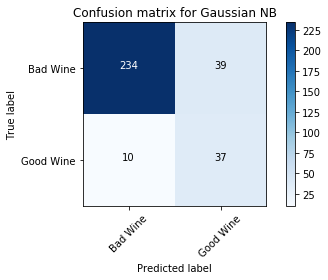

In [587]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
print(classification_report(y_test,nb_predictions))

plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, nb_predictions),
                      title='Confusion matrix for Gaussian NB')
print('Accuracy score: {:.2%}\n'.format(accuracy_score(y_test, nb_predictions)))
plt.show()

In [588]:
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, n_iter=5000, random_state=42)
# X_tsne = tsne.fit_transform(wine_data)

In [630]:


pca3 = PCA(n_components=3)
X_train_reduced = pca3.fit_transform(X_train)
X_test_reduced = pca3.transform(X_test)



In [631]:
nb_r = GaussianNB()
nb_r.fit(X_train_reduced, y_train)
nb_r_predict = nb_r.predict(X_test_reduced)
print(classification_report(y_test,nb_r_predict))
print('Accuracy score: {:.2%}\n'.format(accuracy_score(y_test, nb_r_predict)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       273
           1       0.55      0.23      0.33        47

   micro avg       0.86      0.86      0.86       320
   macro avg       0.72      0.60      0.62       320
weighted avg       0.83      0.86      0.83       320

Accuracy score: 85.94%



0.5953932154588105


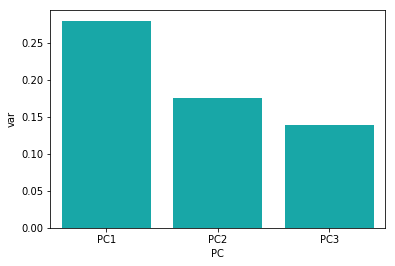

In [632]:
print(np.sum(pca3.explained_variance_ratio_))
df = pd.DataFrame({'var':pca3.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [629]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_r2 = lda.fit_transform(X_train_reduced, y_train)

X_test_r2 = lda.transform(X_test_reduced)
nb_r2 = GaussianNB()
nb_r2.fit(X_train_r2, y_train)
nb_predict_r2 = nb_r2.predict(X_test_r2)
print(classification_report(y_test,nb_predict_r2))
print('{:.2%}\n'.format(accuracy_score(y_test, nb_predict_r2)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       0.50      0.02      0.04        47

   micro avg       0.85      0.85      0.85       320
   macro avg       0.68      0.51      0.48       320
weighted avg       0.80      0.85      0.79       320

85.31%



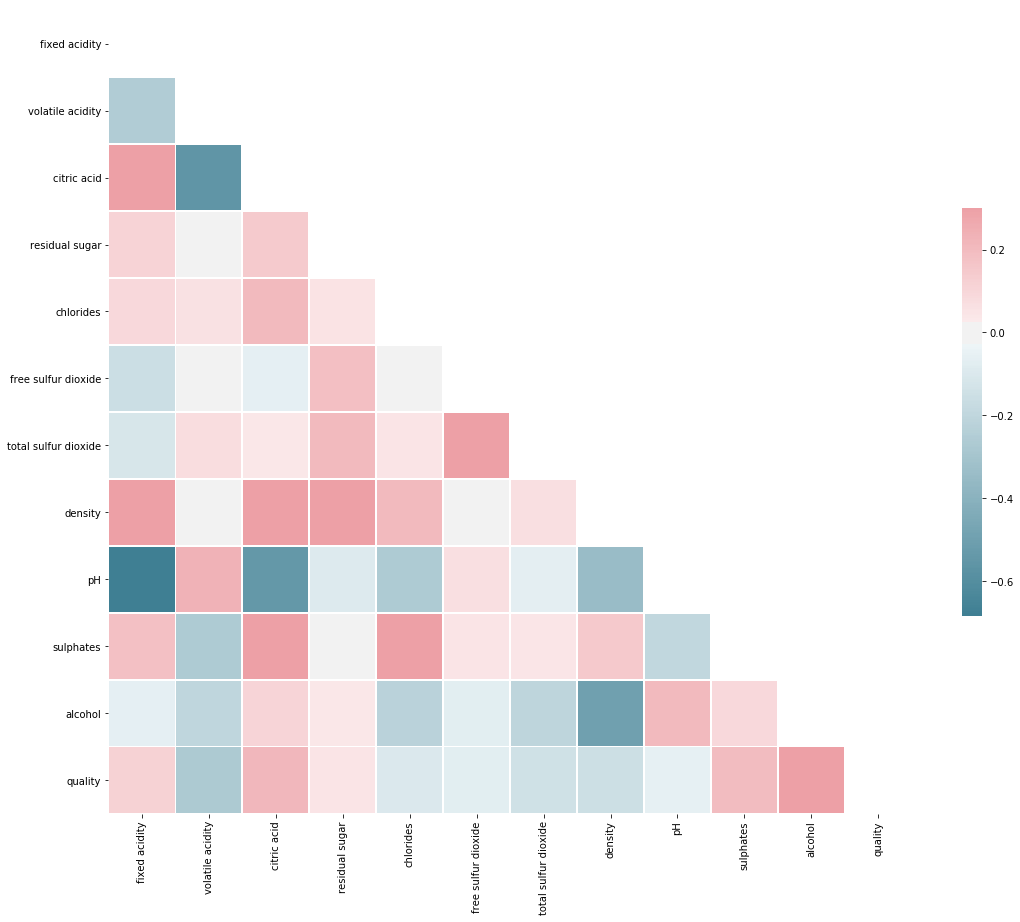

In [620]:
corr = wine_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Logistic Regression